1. Import Libraries
Begin by importing all the necessary libraries for data manipulation, visualization, preprocessing, model building, and evaluation.

In [1]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# ANN model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# To ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style='whitegrid')


2. Load the Datasets
Load your CSV files using pandas. Ensure that your Jupyter Notebook is in the directory containing these files or provide the correct path.

In [2]:
# Load the datasets
frequency_domain = pd.read_csv('/content/drive/MyDrive/Train Data Zip/Train Data Zip/frequency_domain_features_train.csv')
heart_rate_non_linear = pd.read_csv('/content/drive/MyDrive/Train Data Zip/Train Data Zip/heart_rate_non_linear_features_train.csv')
time_domain = pd.read_csv('/content/drive/MyDrive/Train Data Zip/Train Data Zip/time_domain_features_train.csv')

# Display the first few rows to verify
print("Frequency Domain Features:")
display(frequency_domain.head())

print("\nHeart Rate Non-Linear Features:")
display(heart_rate_non_linear.head())

print("\nTime Domain Features:")
display(time_domain.head())


Frequency Domain Features:


,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,HF_LF
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522602,0.421047,1.514737,3686.666157,65.018055,0.015380
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,327.296635,0.003055
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,94.280910,0.010607
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,55.328701,0.018074
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,29.487873,0.033912



Heart Rate Non-Linear Features:


,uuid,SD1,SD2,sampen,higuci,datasetId,condition
0,89df2855-56eb-4706-a23b-b39363dd605a,11.001565,199.061782,2.139754,1.163485,2,no stress
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,9.170129,114.634458,2.174499,1.084711,2,interruption
2,c2d5d102-967c-487d-88f2-8b005a449f3e,11.533417,118.939254,2.135350,1.176315,2,interruption
3,37eabc44-1349-4040-8896-0d113ad4811f,11.119476,127.318597,2.178341,1.179688,2,no stress
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,13.590641,87.718281,2.221121,1.249612,2,no stress



Time Domain Features:


,MEAN_RR,MEDIAN_RR,SDRR,RMSSD,SDSD,SDRR_RMSSD,HR,pNN25,pNN50,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR,uuid
0,885.157845,853.763730,140.972741,15.554505,15.553371,9.063146,69.499952,11.133333,0.533333,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218,89df2855-56eb-4706-a23b-b39363dd605a
1,939.425371,948.357865,81.317742,12.964439,12.964195,6.272369,64.363150,5.600000,0.000000,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286,80c795e4-aa56-4cc0-939c-19634b89cbb2
2,898.186047,907.006860,84.497236,16.305279,16.305274,5.182201,67.450066,13.066667,0.200000,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813,c2d5d102-967c-487d-88f2-8b005a449f3e
3,881.757864,893.460030,90.370537,15.720468,15.720068,5.748591,68.809562,11.800000,0.133333,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138,37eabc44-1349-4040-8896-0d113ad4811f
4,809.625331,811.184865,62.766242,19.213819,19.213657,3.266724,74.565728,20.200000,0.200000,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7


3. Merge Datasets on 'uuid'
Since all datasets contain the uuid column, merge them to create a unified dataset.

In [3]:
# Merge frequency_domain and heart_rate_non_linear on 'uuid'
merged_data = pd.merge(frequency_domain, heart_rate_non_linear, on='uuid')

# Merge the above with time_domain on 'uuid'
merged_data = pd.merge(merged_data, time_domain, on='uuid')

# Display the merged data
print("Merged Data:")
display(merged_data.head())


Merged Data:


,uuid,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
0,89df2855-56eb-4706-a23b-b39363dd605a,2661.894136,72.203287,1009.249419,27.375666,98.485263,15.522602,0.421047,1.514737,3686.666157,...,-0.856554,0.335218,-0.000203,-0.000179,0.017080,0.007969,0.007969,2.143342,-0.856554,0.335218
1,80c795e4-aa56-4cc0-939c-19634b89cbb2,2314.265450,76.975728,690.113275,22.954139,99.695397,2.108525,0.070133,0.304603,3006.487251,...,-0.408190,-0.155286,-0.000059,0.000611,0.013978,0.004769,0.004769,2.930855,-0.408190,-0.155286
2,c2d5d102-967c-487d-88f2-8b005a449f3e,1373.887112,51.152225,1298.222619,48.335104,98.950472,13.769729,0.512671,1.049528,2685.879461,...,0.351789,-0.656813,-0.000011,-0.000263,0.018539,0.008716,0.008716,2.127053,0.351789,-0.656813
3,37eabc44-1349-4040-8896-0d113ad4811f,2410.357408,70.180308,1005.981659,29.290305,98.224706,18.181913,0.529387,1.775294,3434.520980,...,-0.504947,-0.386138,0.000112,0.000494,0.017761,0.008660,0.008660,2.050988,-0.504947,-0.386138
4,aa777a6a-7aa3-4f6e-aced-70f8691dd2b7,1151.177330,43.918366,1421.782051,54.242160,96.720007,48.215822,1.839473,3.279993,2621.175204,...,-0.548408,-0.154252,-0.000100,-0.002736,0.023715,0.013055,0.013055,1.816544,-0.548408,-0.154252


4. Exploratory Data Analysis (EDA)
Understand the data distribution, check for missing values, and visualize relationships.

Dataset Shape: (19999, 35)

Missing Values:
VLF                  0
VLF_PCT              0
LF                   0
LF_PCT               0
LF_NU                0
HF                   0
HF_PCT               0
HF_NU                0
TP                   0
LF_HF                0
HF_LF                0
SD1                  0
SD2                  0
sampen               0
higuci               0
datasetId            0
MEAN_RR              0
MEDIAN_RR            0
SDRR                 0
RMSSD                0
SDSD                 0
SDRR_RMSSD           0
HR                   0
pNN25                0
pNN50                0
KURT                 0
SKEW                 0
MEAN_REL_RR          0
MEDIAN_REL_RR        0
SDRR_REL_RR          0
RMSSD_REL_RR         0
SDSD_REL_RR          0
SDRR_RMSSD_REL_RR    0
KURT_REL_RR          0
SKEW_REL_RR          0
dtype: int64

Summary Statistics:


,VLF,VLF_PCT,LF,LF_PCT,LF_NU,HF,HF_PCT,HF_NU,TP,LF_HF,...,KURT,SKEW,MEAN_REL_RR,MEDIAN_REL_RR,SDRR_REL_RR,RMSSD_REL_RR,SDSD_REL_RR,SDRR_RMSSD_REL_RR,KURT_REL_RR,SKEW_REL_RR
count,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,...,19999.000000,19999.000000,1.999900e+04,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000,19999.000000
mean,2206.594533,64.303917,946.726438,34.085692,95.593261,39.092854,1.610391,4.406739,3192.413825,116.431084,...,0.541022,0.045589,-1.333395e-06,-0.000460,0.018576,0.009689,0.009689,2.008750,0.541022,0.045589
std,1827.754378,16.877325,574.035566,16.127098,4.116735,45.485751,1.761178,4.116735,1931.837492,361.260823,...,1.899742,0.704241,1.627724e-04,0.000864,0.005467,0.003887,0.003887,0.375369,1.899742,0.704241
min,162.489666,19.538255,91.365407,2.181166,70.519949,0.066006,0.002187,0.013684,379.094555,2.392124,...,-1.893856,-2.134510,-1.134110e-03,-0.004425,0.008992,0.003220,0.003220,1.189088,-1.893856,-2.134510
25%,1000.083081,52.765352,543.335791,22.210154,93.737610,10.708597,0.348563,1.238909,1836.032900,14.968346,...,-0.349851,-0.361781,-7.190000e-05,-0.000905,0.014279,0.006985,0.006985,1.756036,-0.349851,-0.361781
50%,1669.251875,66.528373,783.538667,31.989070,96.658633,25.010189,1.035163,3.341367,2803.682001,28.927868,...,0.047122,-0.062513,-3.970000e-07,-0.000307,0.017328,0.008683,0.008683,1.935228,0.047122,-0.062513
75%,2662.508660,76.931153,1205.658783,44.711588,98.761091,44.890856,2.222202,6.262390,4049.478368,79.716192,...,0.745400,0.286418,7.100000e-05,0.000132,0.021821,0.011456,0.011456,2.217721,0.745400,0.286418
max,12346.344320,97.720925,3275.104875,77.419013,99.986316,363.740953,12.774102,29.480051,13134.197630,7306.611088,...,64.007717,6.702230,1.159753e-03,0.002095,0.036571,0.026954,0.026954,3.711601,64.007717,6.702230


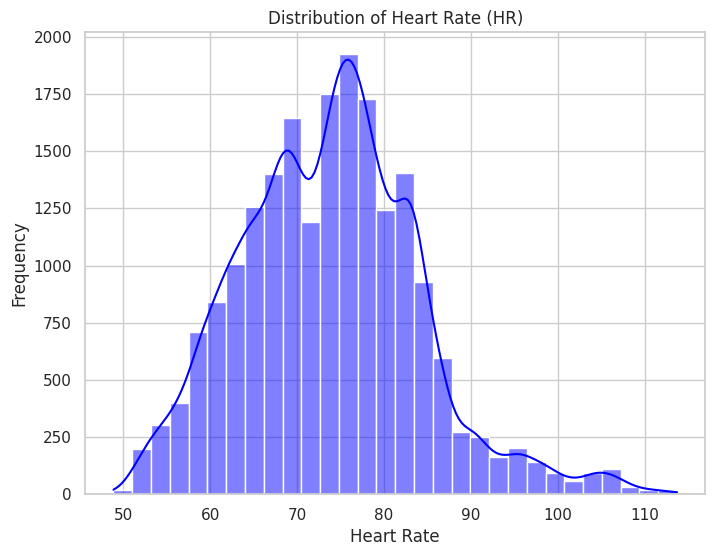

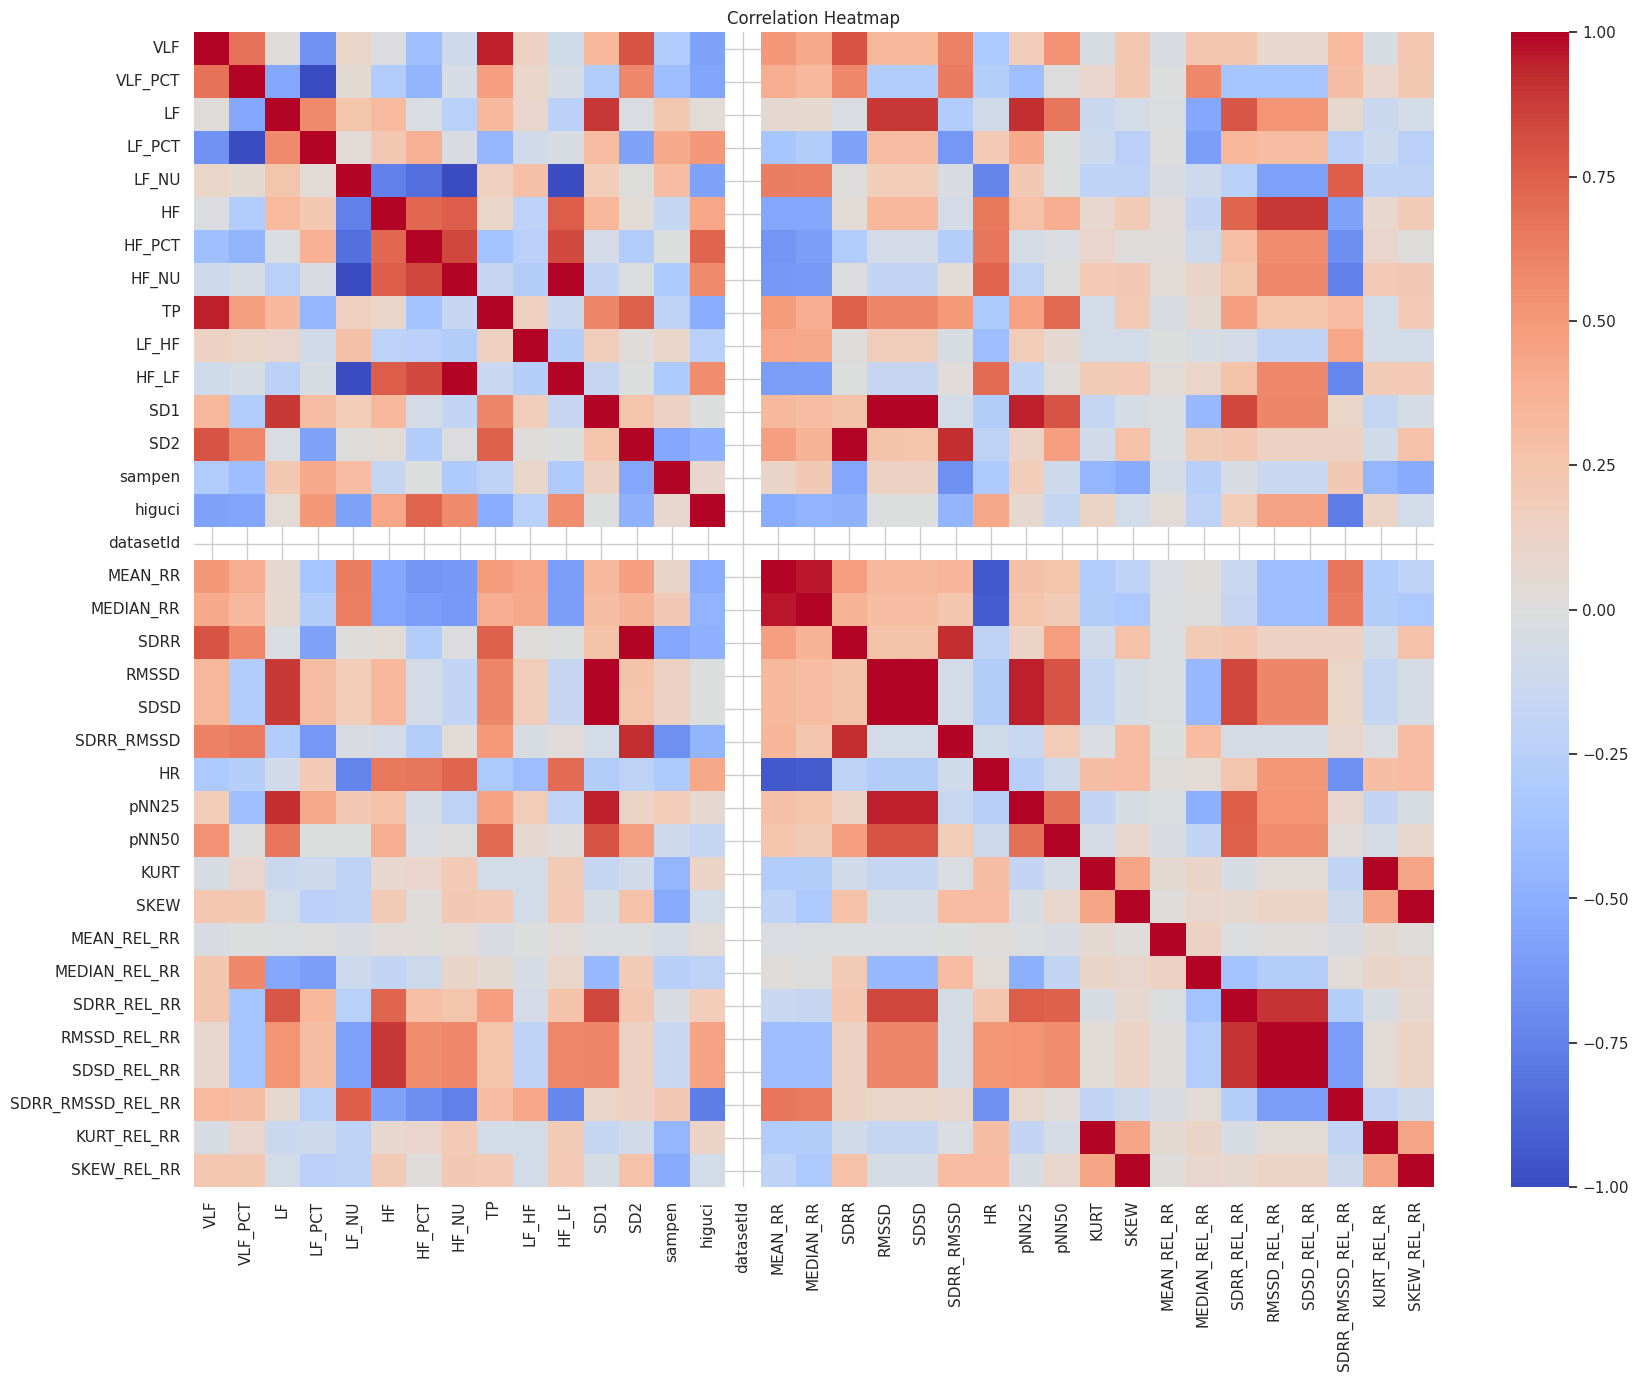

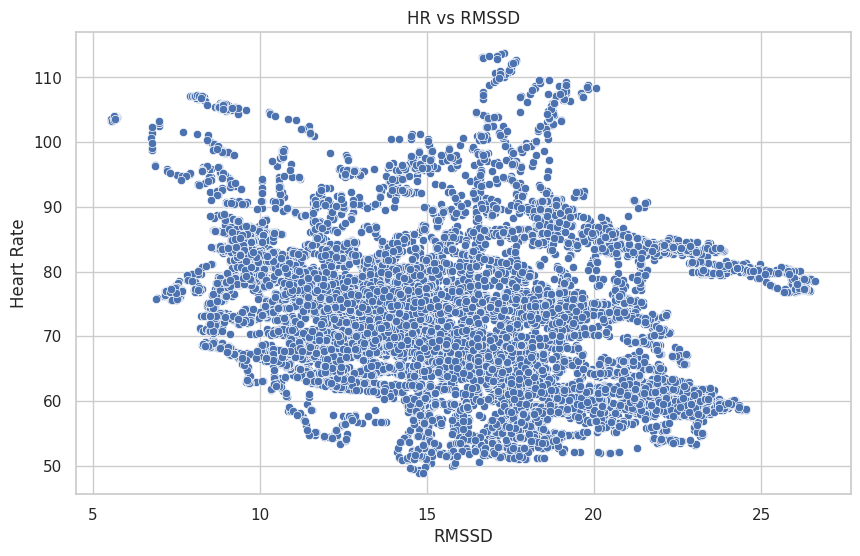

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Check the shape of the merged data
print(f"Dataset Shape: {merged_data.shape}")

# Check for missing values
print("\nMissing Values:")
print(merged_data.isnull().sum())

# Summary statistics
print("\nSummary Statistics:")
display(merged_data.describe())

# Visualize the distribution of the target variable 'HR'
plt.figure(figsize=(8, 6))
sns.histplot(merged_data['HR'], kde=True, bins=30, color='blue')
plt.title('Distribution of Heart Rate (HR)')
plt.xlabel('Heart Rate')
plt.ylabel('Frequency')
plt.show()

# Select only numeric columns for correlation
merged_data_numeric = merged_data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(20, 15))
corr = merged_data_numeric.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# Scatter plot of HR vs some features
plt.figure(figsize=(10, 6))
sns.scatterplot(x='RMSSD', y='HR', data=merged_data_numeric)
plt.title('HR vs RMSSD')
plt.xlabel('RMSSD')
plt.ylabel('Heart Rate')
plt.show()



5. Data Preprocessing
Prepare the data for modeling by handling missing values, encoding categorical variables (if any), and addressing any anomalies.

In [5]:
# Since 'datasetId' and 'condition' are present, check their data types
print("\nData Types:")
print(merged_data.dtypes)

# If 'condition' is not needed for HR prediction, drop it
# Assuming 'condition' is related to stress levels
merged_data = merged_data.drop(['condition'], axis=1)

# Check for any remaining missing values
print("\nMissing Values After Dropping 'condition':")
print(merged_data.isnull().sum())

# If there are missing values, decide on imputation or removal
# For this example, we'll drop rows with missing values
merged_data = merged_data.dropna()

# Verify the shape after dropping missing values
print(f"\nShape after dropping missing values: {merged_data.shape}")



Data Types:
uuid                  object
VLF                  float64
VLF_PCT              float64
LF                   float64
LF_PCT               float64
LF_NU                float64
HF                   float64
HF_PCT               float64
HF_NU                float64
TP                   float64
LF_HF                float64
HF_LF                float64
SD1                  float64
SD2                  float64
sampen               float64
higuci               float64
datasetId              int64
condition             object
MEAN_RR              float64
MEDIAN_RR            float64
SDRR                 float64
RMSSD                float64
SDSD                 float64
SDRR_RMSSD           float64
HR                   float64
pNN25                float64
pNN50                float64
KURT                 float64
SKEW                 float64
MEAN_REL_RR          float64
MEDIAN_REL_RR        float64
SDRR_REL_RR          float64
RMSSD_REL_RR         float64
SDSD_REL_RR          float64
S

6. Feature Selection
Select relevant features for predicting HR. You can use correlation analysis, feature importance from models, or domain knowledge.

In [6]:
# Drop 'uuid' as it's an identifier
merged_data = merged_data.drop(['uuid'], axis=1)

# Separate features and target
X = merged_data.drop(['HR'], axis=1)
y = merged_data['HR']

# Display feature names
print(f"Features ({X.shape[1]}): {X.columns.tolist()}")

# Optional: Use correlation to select features
correlation_matrix = merged_data.corr()
high_corr = correlation_matrix['HR'].abs().sort_values(ascending=False)
print("\nTop Correlated Features with HR:")
print(high_corr.head(10))

# Based on correlation, you might decide to keep or drop certain features
# For this example, we'll keep all features


Features (34): ['VLF', 'VLF_PCT', 'LF', 'LF_PCT', 'LF_NU', 'HF', 'HF_PCT', 'HF_NU', 'TP', 'LF_HF', 'HF_LF', 'SD1', 'SD2', 'sampen', 'higuci', 'datasetId', 'MEAN_RR', 'MEDIAN_RR', 'SDRR', 'RMSSD', 'SDSD', 'SDRR_RMSSD', 'pNN25', 'pNN50', 'KURT', 'SKEW', 'MEAN_REL_RR', 'MEDIAN_REL_RR', 'SDRR_REL_RR', 'RMSSD_REL_RR', 'SDSD_REL_RR', 'SDRR_RMSSD_REL_RR', 'KURT_REL_RR', 'SKEW_REL_RR']

Top Correlated Features with HR:
HR                   1.000000
MEAN_RR              0.943260
MEDIAN_RR            0.923655
HF_NU                0.726688
LF_NU                0.726688
HF_LF                0.704449
SDRR_RMSSD_REL_RR    0.675548
HF_PCT               0.659724
HF                   0.653532
SDSD_REL_RR          0.502565
Name: HR, dtype: float64


7. Train-Test Split and Scaling
Split the data into training and testing sets and scale the features for better model performance.

In [7]:
# Split the data into training and test sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training Set: {X_train.shape}, Testing Set: {X_test.shape}")

# Feature scaling (standardize the data)
scaler = StandardScaler()

# Fit on training data
X_train_scaled = scaler.fit_transform(X_train)

# Transform test data
X_test_scaled = scaler.transform(X_test)


Training Set: (15999, 34), Testing Set: (4000, 34)


8. Build the ANN Model
Construct the ANN architecture using TensorFlow's Keras API. Since this is a regression problem, the output layer will have a single neuron with a linear activation function

In [8]:
# Define the ANN model
model = Sequential()

# Input layer and first hidden layer
model.add(Dense(units=64, activation='relu', input_shape=(X_train_scaled.shape[1],)))

# Second hidden layer
model.add(Dense(units=32, activation='relu'))

# Third hidden layer
model.add(Dense(units=16, activation='relu'))

# Output layer
model.add(Dense(units=1, activation='linear'))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Display the model summary
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │           2,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

9. Train the Model
Train the ANN on the training data and validate it on the test set.

In [13]:
# Define callbacks (optional)
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=100,
    batch_size=32,
    validation_data=(X_test_scaled, y_test),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1076 - mae: 0.2464 - val_loss: 0.1137 - val_mae: 0.2596
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1104 - mae: 0.2490 - val_loss: 0.1517 - val_mae: 0.2619
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1866 - mae: 0.3122 - val_loss: 0.0918 - val_mae: 0.2348
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1087 - mae: 0.2494 - val_loss: 0.0882 - val_mae: 0.2263
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1928 - mae: 0.3148 - val_loss: 0.0787 - val_mae: 0.2146
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.1638 - mae: 0.2910 - val_loss: 0.0751 - val_mae: 0.2107
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.1039 - mae: 0.2443 - val_loss: 0.0761 - val_mae: 0.2062
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0986 - mae: 0.2415 - val_loss: 0.0766 - val_mae: 0.2122
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/

10. Evaluate the Model
Assess the model's performance using appropriate regression metrics.

In [10]:
# Evaluate the model on test data
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f"\nTest Mean Squared Error (MSE): {test_loss:.2f}")
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")

# Predict on test data
y_pred = model.predict(X_test_scaled).flatten()

# Calculate additional metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nCalculated Metrics:")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² Score: {r2:.2f}")


125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0770 - mae: 0.2114

Test Mean Squared Error (MSE): 0.07
Test Mean Absolute Error (MAE): 0.21
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

Calculated Metrics:
MSE: 0.07
MAE: 0.21
R² Score: 1.00


11. Visualize Results
Visualize the training process and the model's predictions versus actual values.

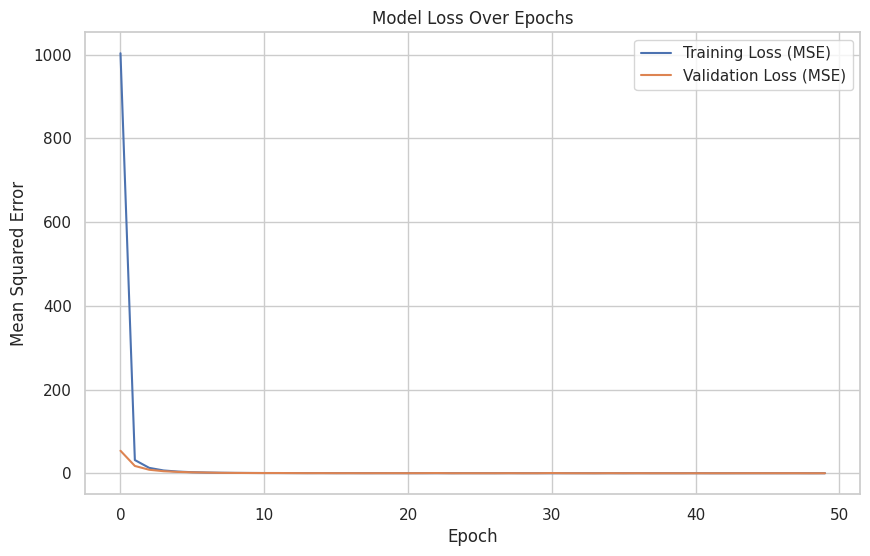

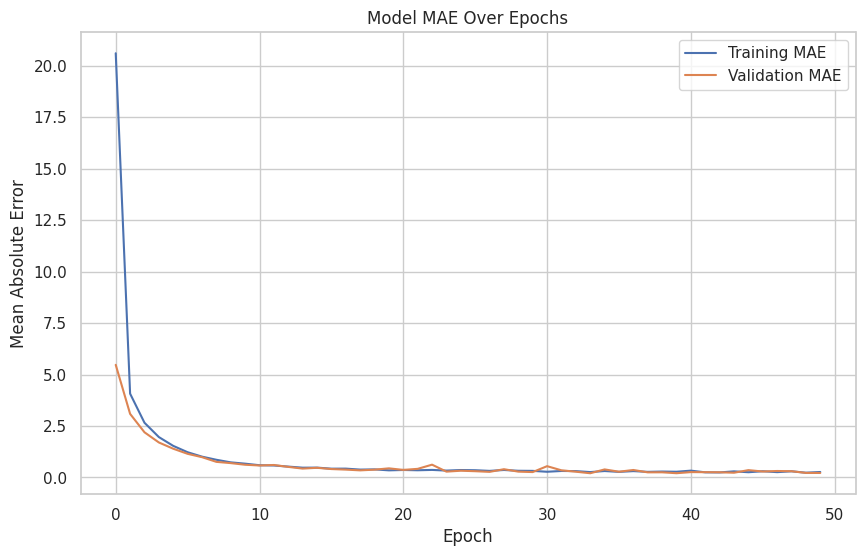

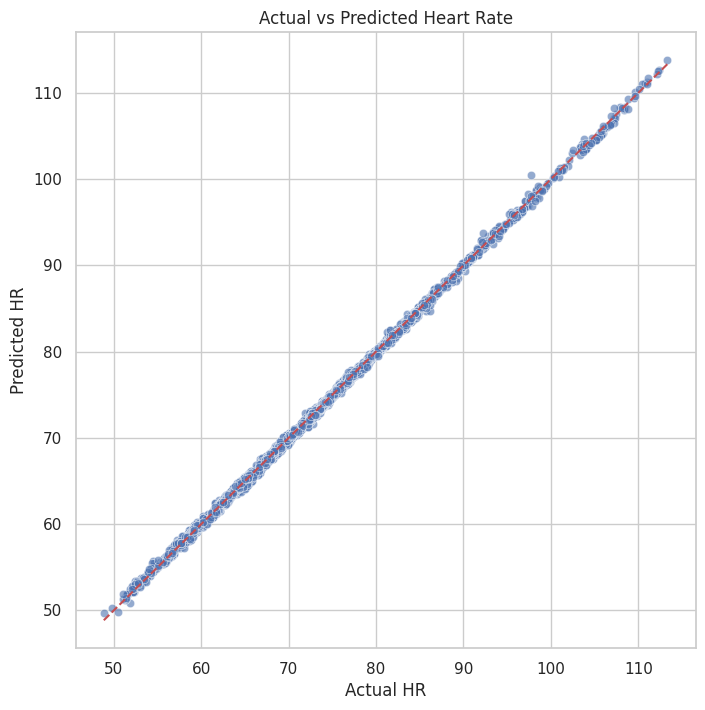

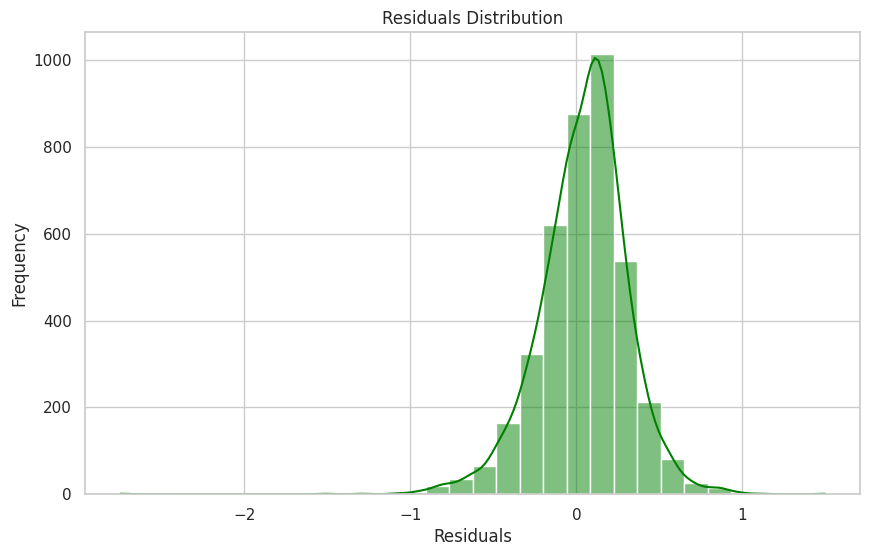

In [11]:
# Plot training & validation loss (MSE)
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.title('Model Loss Over Epochs')
plt.ylabel('Mean Squared Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Plot training & validation MAE
plt.figure(figsize=(10,6))
plt.plot(history.history['mae'], label='Training MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE Over Epochs')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend()
plt.show()

# Scatter plot of Actual vs Predicted HR
plt.figure(figsize=(8,8))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.title('Actual vs Predicted Heart Rate')
plt.xlabel('Actual HR')
plt.ylabel('Predicted HR')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10,6))
sns.histplot(residuals, kde=True, bins=30, color='green')
plt.title('Residuals Distribution')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
